```
Generative AI with Python, by Fernando Amaral
```

## Setup

In [ ]:
!pip install transformers

In [ ]:
import transformers
from transformers import pipeline

## Diagram


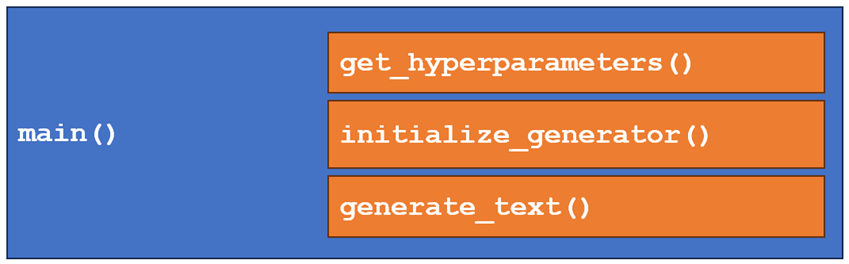

## Code

In [ ]:
def get_hyperparameters():
    max_length = int(input("Max length [60]: ") or "60")
    do_sample = input("Do sample [True]: ") in ["True", "true", "1", ""]
    temperature = float(input("Temperature [0.7]: ") or "0.7")
    top_k = int(input("Top K [50]: ") or "50")
    top_p = float(input("Top P [0.85]: ") or "0.85")
    repetition_penalty = float(input("Repetition Penalty [1.0]: ") or "1.0")
    length_penalty = float(input("Length Penalty [1.0]: ") or "1.0")
    num_return_sequences = int(input("Number of return sequences [1]: ") or "1")
    early_stopping = input("Early stopping [False]: ") in ["True", "true", "1"]
    pad_token_id = int(input("Pad token ID [50256]: ") or "50256")

    return (max_length, do_sample, temperature, top_k, top_p, repetition_penalty,
            length_penalty, num_return_sequences, early_stopping, pad_token_id)

In [ ]:
def initialize_generator(model_name="gpt2-medium"):
    try:
        generator = pipeline("text-generation", model=model_name)
        return generator
    except Exception as e:
        print(f"Error on initialization: {e}")
        return None

In [ ]:
def generate_text(generator, prompt, max_length, do_sample, temperature, top_k,
                  top_p, repetition_penalty, length_penalty, num_return_sequences,
                  early_stopping, pad_token_id):
    try:
        result = generator(prompt,
                            max_length=max_length,
                            do_sample=do_sample,
                            temperature=temperature,
                            top_k=top_k,
                            top_p=top_p,
                            repetition_penalty=repetition_penalty,
                            length_penalty=length_penalty,
                            num_return_sequences=num_return_sequences,
                            early_stopping=early_stopping,
                            pad_token_id=pad_token_id)
        return result
    except Exception as e:
        print(f"Error on text generation: {e}")
        return None

In [ ]:
def main():
    prompt = input("Enter your prompt: ")

    adjust_hyperparams = input("Do you want to adjust any Hyper Parameter? [n]: ").lower() in ["y", "yes"]

    if adjust_hyperparams:
        hyperparams = get_hyperparameters()
    else:
        hyperparams = (60, True, 0.7, 50, 0.85, 1.0, 1.0, 1, False, 50256)

    generator = initialize_generator("gpt2-medium")
    results = generate_text(generator, prompt, *hyperparams)

    return results

## Execution

In [ ]:
results = main()
for i, result in enumerate(results):
  print(f"\nResult {i + 1}:\n{result['generated_text']}")